In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HACKATHON_TRAINING_DATA.csv").head(10000)
df

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45656,DEC24,0,2034
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,3.0,45625,NOV24,0,2035
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,2.0,45687,JAN25,0,2036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5.956,1105500.0,948695.75,3.968,3623,22265.0,Y,55.275,17.856,110.0,...,9yrs 6mon,0.0,G,#Total Auto Loan,AUTO LOAN,53.0,45625,NOV24,0,27137
9996,6.041,1105500.0,936433.75,3.883,3623,22265.0,Y,55.360,17.941,110.0,...,9yrs 6mon,0.0,G,#Total Auto Loan,AUTO LOAN,20.0,45656,DEC24,0,27138
9997,0.170,757500.0,7860.00,25.917,9527,6035.0,N,42.181,15.468,110.0,...,1yrs 8mon,0.0,F,#Housing Loan,HOME LOAN,27.0,45656,DEC24,0,27139
9998,5.969,185500.0,6232.94,0.033,2192,4067.0,N,58.279,15.605,110.0,...,6yrs 0mon,0.0,D,#Total Xpress Credit,PERSONAL LOAN,92.0,45687,JAN25,0,27140


In [3]:
features = ['ACCT_AGE', 'LIMIT', 'OUTS', 'INSTALAMT', 'VINTAGE', 'KYC_SCR', 'AGE']
df = df[features + ['TARGET']].dropna()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [5]:
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = model.fit_predict(X_scaled)

In [6]:
df['is_fraud'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

In [7]:
df.to_csv('fraud_predictions.csv', index=False)

In [8]:
print(confusion_matrix(df['TARGET'], df['is_fraud']))
print(classification_report(df['TARGET'], df['is_fraud']))

[[8982   92]
 [ 906    8]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9074
           1       0.08      0.01      0.02       914

    accuracy                           0.90      9988
   macro avg       0.49      0.50      0.48      9988
weighted avg       0.83      0.90      0.86      9988



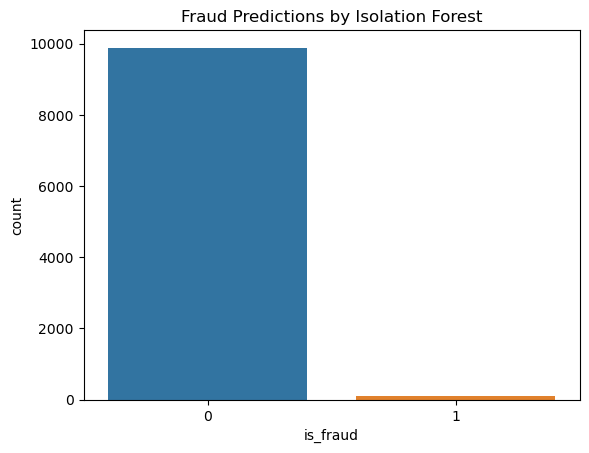

In [9]:
sns.countplot(data=df, x='is_fraud')
plt.title("Fraud Predictions by Isolation Forest")
plt.show()